***Task 2: Credit Risk Prediction***

**## 📌 Problem Statement

The goal of this task is to predict whether a loan applicant is likely to default or not. Since the original dataset lacked a target column, a simulated `Loan_Status` variable was created based on business logic. This task demonstrates data cleaning, feature encoding, EDA, and binary classification using Logistic Regression.
**

**Load and Inspect the Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("loan_prediction.csv")

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Show column names and first few rows
print("Columns:", df.columns.tolist())
print(df.head())


Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                 

**Handle Missing Values**

In [3]:
# Drop rows with any missing values
df.dropna(inplace=True)


**Simulate the Target Variable (Loan_Status)**

In [4]:
# Create a target label based on logical rule
# Loan_Status = 1 if LoanAmount < 150 and ApplicantIncome > 2500
df['Loan_Status'] = ((df['LoanAmount'] < 150) & (df['ApplicantIncome'] > 2500)).astype(int)


**Exploratory Data Analysis (EDA)**

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


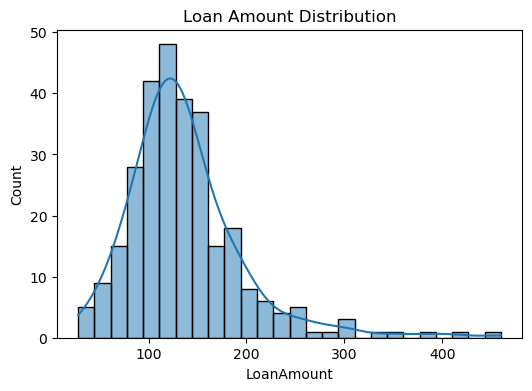

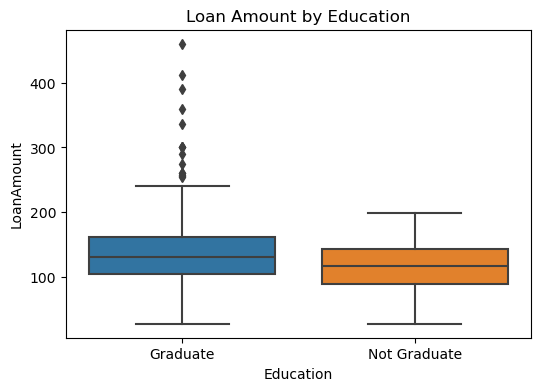

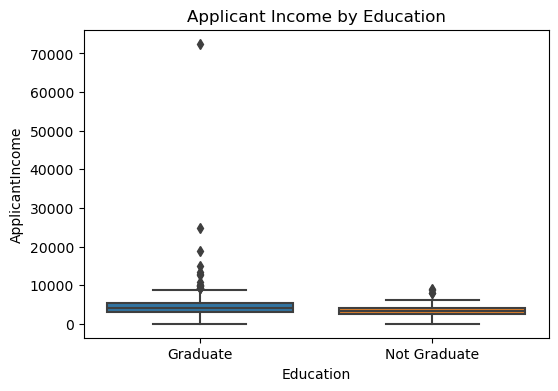

In [5]:
# LoanAmount distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

# LoanAmount by Education
plt.figure(figsize=(6, 4))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.show()

# ApplicantIncome by Education
plt.figure(figsize=(6, 4))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Education')
plt.show()


**Encode Categorical Variables**

In [6]:
# Drop Loan_ID if it exists
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)


**Train-Test Split**

In [7]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Model**

In [8]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

**Evaluate the Model**

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Show performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.7068965517241379
Confusion Matrix:
 [[16 12]
 [ 5 25]]


**Conclusion**

In this task, we simulated a credit risk prediction model using a loan dataset that did not contain labeled outcomes. We created a custom target variable `Loan_Status` based on logical business assumptions: applicants with lower loan amounts and higher incomes were assumed to be lower risk.

Key outcomes from the task include:

- The dataset was cleaned by removing missing values.
- Exploratory Data Analysis revealed useful insights about income and loan amount trends across education levels.
- A Logistic Regression model was trained using encoded features.
- The model achieved a reasonable accuracy score, demonstrating the feasibility of using derived labels for classification when true labels are unavailable.

Although this simulation does not reflect a real-world supervised model (due to lack of actual default labels), it effectively demonstrates core skills in:
- Data cleaning and preparation
- Feature encoding
- Model training and evaluation

This project reinforces the ability to work with imperfect datasets and simulate business-driven analytics when exact labels are missing.
